In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
data_path = os.getenv('DATA_PATH')
result_path = os.getenv('RESULT_PATH')
root = os.getenv('ROOT')

os.chdir(root)
os.getcwd()

'/disks/qnap3/users/23-miura/coauth-interest'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random
from scipy.stats import expon
from scipy.stats import pareto
import os

from source.package.util import plotter

In [23]:
year_df = pd.read_pickle(data_path + 'paper_detail/year.pickle')
authors_valid = pd.read_pickle(result_path + 'authors_valid.pickle')

In [ ]:
merged = pd.merge(authors_valid, year_df, on='eid', how='left')
merged.sort_values("year", inplace=True)
merged["shuffled_year"] = merged["year"].sample(frac=1).values
merged.head()

,eid,authid,authseq,indexname,surname,givenname,doctype,year
0,85015329278,6506594745,1,Dereli O.,Dereli,Ömer,ar,2017
1,85015329278,55860963200,4,Karakas Sarikaya E.,Karakaş Sarikaya,Ebru,ar,2017
2,85015329278,16175094900,2,Erdogdu Y.,Erdoğdu,Yusuf,ar,2017
3,85015329278,57193622072,3,Ates L.,Ateş,Levent,ar,2017
4,85015329278,57193630639,5,Ozturan F.P.,Özturan,F. Pınar,ar,2017


52


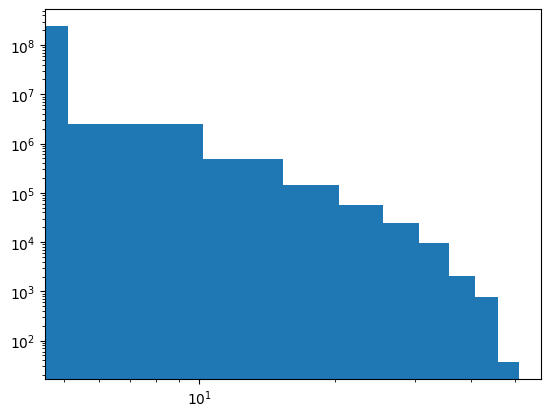

In [ ]:
group = merged[["year","authid"]].groupby(by="authid").diff().dropna()
print(group["year"].nunique())

plotter(group["year"].values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)

104


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0.00017939, 0.0003487 , 0.00052108, 0.00072105, 0.0009262 ,
        0.00112651, 0.00131808, 0.00151993, 0.00173219, 0.00195786,
        0.00217606, 0.00239696, 0.00263052, 0.0028692 , 0.00312618,
        0.00338217, 0.00361563, 0.00386939, 0.00412471, 0.00440811,
        0.0047174 , 0.0050135 , 0.00530265, 0.00561921, 0.00596334,
        0.00630854, 0.0067568 , 0.00720081, 0.00764392, 0.00807911,
        0.00853277, 0.00900253, 0.00951593, 0.01009458, 0.01076995,
        0.01154784, 0.01242106, 0.01333423, 0.01427433, 0.01531592,
        0.01641249, 0.01768622, 0.01910628, 0.02055839, 0.0220403 ,
        0.02352458, 0.02509017, 0.0266837 , 0.02844526, 0.03033008,
        0.03236318, 0.03478951, 0.03237632, 0.03032378, 0.02844242,
        0.02669502, 0.0250785 , 0.02351411, 0.02202153, 0.02057411,
        0.01911072, 0.0176939 , 0.01642293, 0.01531707, 0.01427866,
        0.01332496, 0.01241119, 0.01156013, 0.0107543 , 0.01008729,
        0.0095196 , 0.00901127, 0.00852638, 0.00

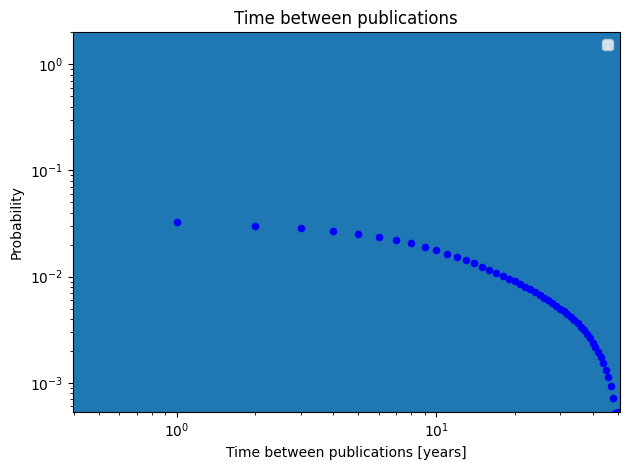

In [ ]:
group_shuflled = merged[["shuffled_year","authid"]].groupby(by="authid").diff().dropna()
print(group_shuflled["shuffled_year"].nunique())

plotter(group_shuflled["shuffled_year"].values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)
plt.show()

In [121]:
merged = merged[['eid','authid', 'year', 'shuffled_year']]
merged.to_pickle(result_path + 'time_between_publications.pickle')

,eid,authid,year,shuffled_year
22875929,14792462,35399872200,1970,2008
57080137,14888096,7005560330,1970,1997
57080138,14901281,57217394287,1970,2018
57080139,14888097,7409818227,1970,2011
57080140,14901282,7101930432,1970,2016
...,...,...,...,...
86597809,85121394226,57201395607,2022,2015
86597810,85121394226,14054955600,2022,1981
86597811,85121394226,57192944024,2022,2013
219408465,85110282930,57226081428,2022,2014


## Saved

In [ ]:
merged = pd.read_pickle(result_path + 'time_between_publications.pickle')
grouped = merged.groupby('authid')

In [3]:
for g in grouped:
    print(g)
    break

(4,                    eid  authid  year  shuffled_year
28398866      17858319       4  1978           2020
213709955     19206542       4  1980           1973
261319997     19982084       4  1982           1985
251979996     24229822       4  1988           2008
203768811  84886344041       4  1993           2015
203769980  84886345548       4  1994           2007
121940683     28565119       4  1994           2020
93831498      28953868       4  1995           1991
212867023     29134046       4  1995           2020
270201567     28977611       4  1995           2017
270201564     28977611       4  1995           2009
270201563     28977611       4  1995           1998
270201565     28977611       4  1995           2004
270201566     28977611       4  1995           2012
219788909     33950403       4  2000           2019
182427446     39177620       4  2000           2018
149004920  85033485934       4  2005           2016
94916306   84928074476       4  2007           2018
13000472

In [ ]:
shuffled_year_author = pd.DataFrame()
for g in grouped:
    shuffled_year_author = pd.concat([
        shuffled_year_author,\
        pd.DataFrame({\
          "shuffled_year_author":g[1]['year']\
            .sample(frac=1)\
            .sort_values()\
            .diff().dropna()\
            ,"authid":g[0]})],
          axis='index')
    print(shuffled_year_author.tail(3))
shuffled_year_author.head()

In [ ]:
year_diff = merged[["authid","year"]].groupby(by="authid").diff().dropna()
year_diff.head()

/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:44: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(left, right)


Calculating best minimal value for power law fit
3.4645901336575933
0.016691162225342757
2.0
0.140575482259355
[0.00466735]


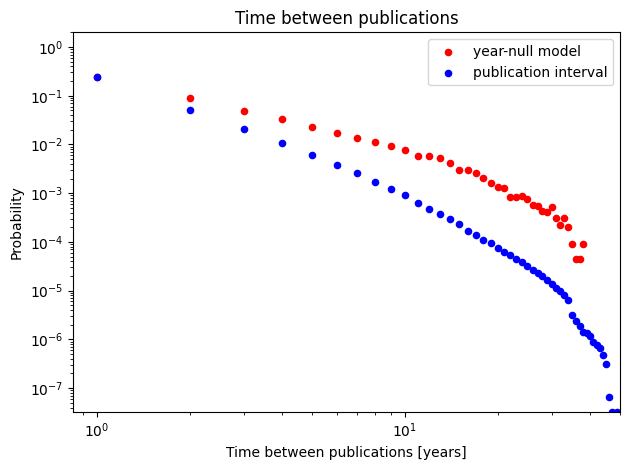

In [158]:
import powerlaw
# plotter(group_shuflled["shuffled_year"].values,
#         count='probability',
#         plot='power-law',
#         c='red',
#         xlabel='Time between publications',
#         ylabel='Probability',
#         title='Time between publications',
#         save=True,
#         path=result_path+'time_between_publications.png'
# )

bins, hist = plotter(shuffled_year_author["shuffled_year_author"].values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        c="r",
        l="year-null model",
        # limit=(min(bins_original), max(bins_original), min(hist_original), max(hist_original)),
        save=True,
        path=result_path+'time_between_publications.png'
)
plotter(year_diff.values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        l="publication interval",
        save=True,
        path=result_path+'time_between_publications.png'
)


data = shuffled_year_author["shuffled_year_author"].values
data_cutoff = data[data<10]

# Fit the data to a power-law distribution
# fit = Fit(data+1)
fit = Fit(data_cutoff+1)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.power_law.pdf(10))  # The probability density function at x=10

In [139]:
year_diff.to_pickle(result_path+"year_diff_single.pickle")
shuffled_year_author.to_pickle(result_path+"shuffled_year_author.pickle")

In [105]:
from powerlaw import Fit

# Your data
data = group["year"].values
data_cutoff = data[data<32]

# Fit the data to a power-law distribution
fit = Fit(data_cutoff+1)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.power_law.pdf(10))  # The probability density function at x=10

# data[data<32]
# Calculating best minimal value for power law fit
# 4.709575229895229%
# 0.0033165271087566006
# 10.0
# 0.07893690808343135
# [0.37095752]

# data[data<25]
# Calculating best minimal value for power law fit
# 4.477011135671789%
# 0.0019396112729131846
# 7.0
# 0.09248904371811006
# [0.10060284]

Calculating best minimal value for power law fit
4.477011135671789%
0.0019396112729131846
7.0
0.09248904371811006
[0.10060284]


<Axes: >

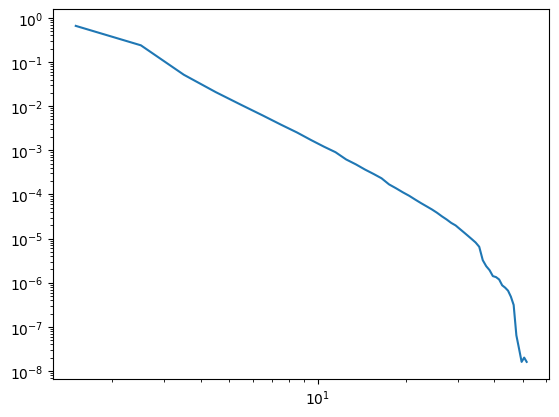

In [99]:
from powerlaw import plot_pdf
# Plot the data and the fitted distribution
plot_pdf(data+1, linear_bins=True )#, powerlaw_fit=fit)

plotter(group["year"].values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([6.58912046e-01, 2.38906178e-01, 5.15221605e-02, 2.07454977e-02,
        1.06303523e-02, 6.15527213e-03, 3.80745090e-03, 2.53816900e-03,
        1.70367880e-03, 1.21087109e-03, 9.06006071e-04, 6.20957779e-04,
        4.79561643e-04, 3.65846084e-04, 2.91437667e-04, 2.32511196e-04,
        1.69181455e-04, 1.37657586e-04, 1.11810027e-04, 9.32139661e-05,
        7.63340924e-05, 6.34828281e-05, 5.37174788e-05, 4.57166603e-05,
        3.84651633e-05, 3.18985298e-05, 2.70641985e-05, 2.26689855e-05,
        1.98691019e-05, 1.64770128e-05, 1.37738158e-05, 1.15459948e-05,
        9.70089162e-06, 8.17404863e-06, 6.52231874e-06, 3.23900202e-06,
        2.36882237e-06, 1.92567533e-06, 1.41404193e-06, 1.34152696e-06,
        1.18441119e-06, 8.74208256e-07, 7.73493019e-07, 6.60691954e-07,
        4.83433137e-07, 3.14231539e-07, 6.44577516e-08, 3.22288758e-08,
        1.61144379e-08, 3.22288758e-08]),
 array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
        12.5, 13.5, 

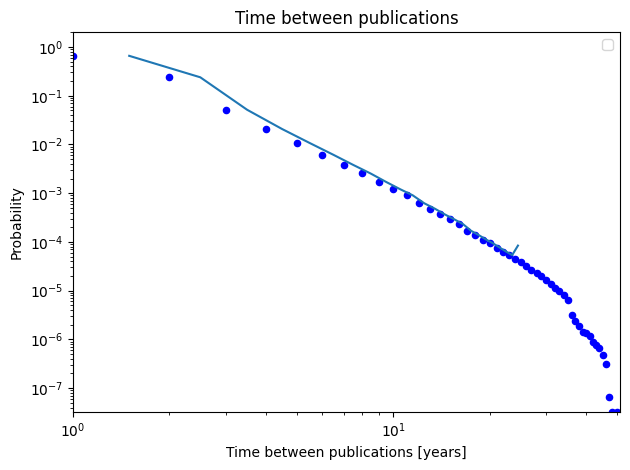

In [109]:
from powerlaw import plot_pdf
# Plot the data and the fitted distribution
plot_pdf(data_cutoff+1, linear_bins=True)#, powerlaw_fit=fit)

plotter(group["year"].values+1,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)

In [110]:
import numpy as np

def exp_powerlaw_pdf(x, a, xmin):
    return np.exp(-x) * np.power(x, -a) / np.sum(np.exp(-np.arange(xmin, np.inf)) * np.power(np.arange(xmin, np.inf), -a))

data = group["year"].values
data_cutoff = data[data<32]
# Fit the data to the custom distribution
# fit = Fit(data+1, pdf=exp_powerlaw_pdf, xmin=1, discrete=True)
fit = Fit(data_cutoff+1, pdf=exp_powerlaw_pdf, xmin=1, discrete=True)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.pdf(10))  # The probability density function at x=10

# no cutoff
# 1.998224856370066
# 6.335865726294845e-05
# 1.0
# 0.13849193548545746
# (array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 32.,
#        41., 53.]), array([6.58912046e-01, 2.38906178e-01, 5.15221605e-02, 2.07454977e-02,
#        1.06303523e-02, 4.98136152e-03, 2.12092390e-03, 1.05843858e-03,
#        4.39450793e-04, 1.62790066e-04, 6.64930051e-05, 2.43166868e-05,
#        5.13692471e-06, 3.69960637e-07]))

# with cutoff <32
# 1.9983522728573533
# 6.33679842320187e-05
# 1.0
# 0.1384851979881413
# (array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 33.]), array([6.58937827e-01, 2.38915526e-01, 5.15241765e-02, 2.07463094e-02,
#        1.06307682e-02, 4.98155643e-03, 2.12100689e-03, 1.05848000e-03,
#        4.39467988e-04, 1.62796436e-04, 6.64956068e-05, 2.27212393e-05])

1.9983522728573533
6.33679842320187e-05
1.0
0.1384851979881413
(array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 33.]), array([6.58937827e-01, 2.38915526e-01, 5.15241765e-02, 2.07463094e-02,
       1.06307682e-02, 4.98155643e-03, 2.12100689e-03, 1.05848000e-03,
       4.39467988e-04, 1.62796436e-04, 6.64956068e-05, 2.27212393e-05]))


In [111]:
import numpy as np

def exp_cutoff_powerlaw_pdf(x, a, xmin):
    return np.exp(-1/x) * np.power(x, -a) / np.sum(np.exp(-1/np.arange(xmin, np.inf)) * np.power(np.arange(xmin, np.inf), -a))

data = group["year"].values
data_cutoff = data[data<32]
# Fit the data to the custom distribution
# fit = Fit(data+1, pdf=exp_cutoff_powerlaw_pdf, xmin=1, discrete=True)
fit = Fit(data_cutoff+1, pdf=exp_cutoff_powerlaw_pdf, xmin=1, discrete=True)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.pdf(10))  # The probability density function at x=10

# without cutoff
# 1.998224856370066
# 6.335865726294845e-05
# 1.0
# 0.13849193548545746
# (array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 32.,
#        41., 53.]), array([6.58912046e-01, 2.38906178e-01, 5.15221605e-02, 2.07454977e-02,
#        1.06303523e-02, 4.98136152e-03, 2.12092390e-03, 1.05843858e-03,
#        4.39450793e-04, 1.62790066e-04, 6.64930051e-05, 2.43166868e-05,
#        5.13692471e-06, 3.69960637e-07]))

# with cutoff <32
# 1.9983522728573533
# 6.33679842320187e-05
# 1.0
# 0.1384851979881413
# (array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 33.]), array([6.58937827e-01, 2.38915526e-01, 5.15241765e-02, 2.07463094e-02,
#        1.06307682e-02, 4.98155643e-03, 2.12100689e-03, 1.05848000e-03,
#        4.39467988e-04, 1.62796436e-04, 6.64956068e-05, 2.27212393e-05]))

1.9983522728573533
6.33679842320187e-05
1.0
0.1384851979881413
(array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 33.]), array([6.58937827e-01, 2.38915526e-01, 5.15241765e-02, 2.07463094e-02,
       1.06307682e-02, 4.98155643e-03, 2.12100689e-03, 1.05848000e-03,
       4.39467988e-04, 1.62796436e-04, 6.64956068e-05, 2.27212393e-05]))


In [115]:
res = pd.read_pickle(result_path + 'As_100k.pickle')
res

,authid,year,seq,eid,source_authid,previous_work
6,35559088600,7,1,77950575482,57221030048,3.142705e+09
5,6603235184,0,2,40819808,7402948720,4.618880e+05
7,6701475619,33,69,84974535000,7402948720,3.384616e+10
8,6701475619,1,2,85020222878,7402948720,8.497454e+10
9,6701475619,0,2,85033679162,7402948720,8.502022e+10
...,...,...,...,...,...,...
70,57225802515,1,2,85051415338,55081912000,8.502363e+10
71,57225802515,0,1,85040100930,55081912000,8.505142e+10
72,57225802515,1,1,85062042971,55081912000,8.504010e+10
73,57225802515,0,1,85062593490,55081912000,8.506204e+10


In [117]:
# Your data
# data = res["year"].values
data_cutoff = data[data<32]

# Fit the data to a power-law distribution
# fit = Fit(data+1)
fit = Fit(data_cutoff+1)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.power_law.pdf(10))  # The probability density function at x=10

# Calculating best minimal value for power law fit
# 6.805007556301697% # maybe without %
# 0.10931461642797022
# 18.0
# 0.07147125819418121
# []

Calculating best minimal value for power law fit
6.805007556301697%
0.10931461642797022
18.0
0.07147125819418121
[]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([4.91928135e-01, 3.17027963e-01, 9.89667300e-02, 3.76680995e-02,
        2.01801180e-02, 1.06845755e-02, 7.00369869e-03, 4.48059324e-03,
        3.32972855e-03, 2.15450886e-03, 1.64886995e-03, 1.20975291e-03,
        8.70600423e-04, 6.06330483e-04, 5.17998164e-04, 3.70414126e-04,
        3.26793228e-04, 2.13742400e-04, 1.86842847e-04, 1.32316724e-04,
        1.04326648e-04, 7.19744818e-05, 6.32503022e-05, 4.36208980e-05,
        4.03493307e-05, 5.37991076e-05, 1.99929116e-05, 2.10834341e-05,
        1.30862694e-05, 1.30862694e-05, 1.19957470e-05, 9.45119458e-06,
        2.18104490e-06, 6.17962722e-06, 3.99858232e-06, 3.27156735e-06,
        2.18104490e-06, 1.09052245e-06, 1.45402993e-06, 2.54455239e-06,
        0.00000000e+00, 2.18104490e-06, 3.63507484e-07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.63507484e-07]),
 array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
        12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5

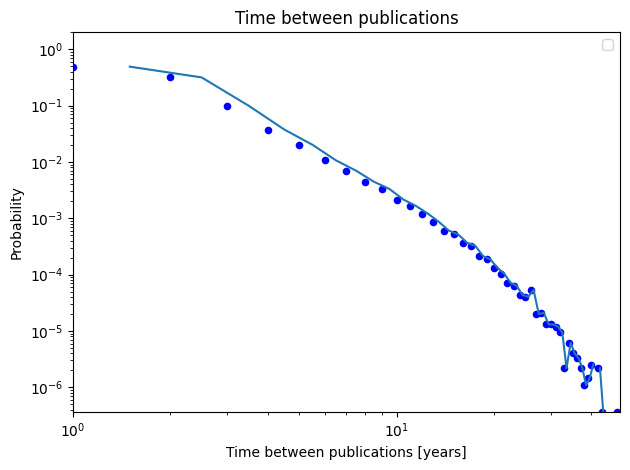

In [118]:
from powerlaw import plot_pdf
# Plot the data and the fitted distribution
plot_pdf(data+1, linear_bins=True)#, powerlaw_fit=fit)

plotter(data+1,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)

In [4]:
d = "As"
authors_valid= pd.read_pickle(result_path+f"/authors_valid_{d}.pickle")
sample_authors = pd.read_pickle(result_path+f"/sample_authors_{d}.pickle")

In [5]:
year_df = pd.read_pickle(data_path+"/paper_detail/year.pickle")
year_df = pd.DataFrame(year_df.sort_values())

In [6]:
year_df = year_df.rename(columns = {0:"year"})

In [63]:
def calculate_coauth_intervals(id,authors_valid,year_df):
    works = authors_valid['eid'][authors_valid['authid']==id]
    # works = works.sample(frac=0.5)
    if works.shape[0]<3: return None
    
    selected_papers = year_df[year_df.index.isin(works.values)]
    # print(selected_papers)
    # np.random.shuffle(selected_papers.values)# null-year
    selected_papers = selected_papers.sort_values(by='year')
    # print(selected_papers)
    selected_papers = selected_papers.assign(seq=list(range(0,len(selected_papers))))
    coauthors = authors_valid[authors_valid['eid'].isin(works)].query(f"authid!={id}")
    
    df_seqyear = pd.merge(coauthors,selected_papers, how='left', on='eid').sort_values(by='seq')
    df_seqyear_multi = df_seqyear.groupby(by='authid', group_keys=True).filter(lambda x: len(x) > 1)
    if len(df_seqyear_multi) < 3: return None
    df_seqyear_delta = df_seqyear_multi.groupby(by='authid', group_keys=True)[['year','seq']] \
    .apply(lambda x:  x - x.shift(1)) \
    .dropna().astype(int).reset_index()
    
    df_seqyear_delta = pd.merge(df_seqyear_delta, df_seqyear["eid"], how="left", left_on="level_1", right_index=True).drop(columns=["level_1"])
    df_seqyear_delta["source_authid"] = id
    df_seqyear_delta["previous_work"] = df_seqyear_delta.groupby("authid").shift(1)["eid"]

    df_seqyear_delta = df_seqyear_delta.dropna()
    return df_seqyear_delta

num_iterations = 5
batch_size = 1000

# disciplines = partitions["name"]
# for d in disciplines:

import tqdm
suffix = "_default_5k"

for i in range(num_iterations):
    result = pd.DataFrame()
    for j in tqdm.tqdm(range(batch_size)):
        result = pd.concat([result, calculate_coauth_intervals(sample_authors[j+i*batch_size],authors_valid,year_df)],axis=0)
    result.to_pickle(result_path+f"/temp/{d}_{i:02}{suffix}.pickle")

auth = pd.concat([pd.read_pickle(result_path+f"/temp/{d}_{i:02}{suffix}.pickle") for i in range(0,num_iterations)],axis=0)
auth.to_pickle(result_path+f"/{d}{suffix}.pickle")

 12%|████▉                                   | 123/1000 [01:07<08:42,  1.68it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(left, right)
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:49: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


Calculating best minimal value for power law fit
5.770206769788717%
0.10027552107378299
4.0
0.15397461855845607
[0.0060295]


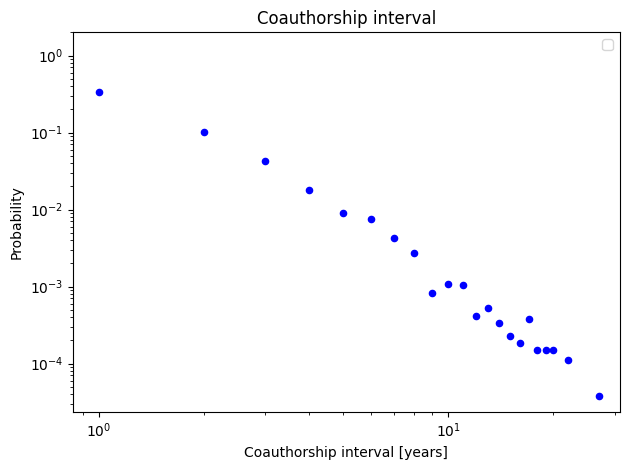

In [62]:
from powerlaw import Fit

plotter(auth["year"])

data = auth["year"]
data_cutoff = data[data<10]

# Fit the data to a power-law distribution
# fit = Fit(data+1)
fit = Fit(data_cutoff+1)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.power_law.pdf(10))  # The probability density function at x=10


In [10]:
result_As = pd.read_pickle(result_path +"As_100k.pickle")
result_As

,authid,year,seq,eid,source_authid,previous_work
6,35559088600,7,1,77950575482,57221030048,3.142705e+09
5,6603235184,0,2,40819808,7402948720,4.618880e+05
7,6701475619,33,69,84974535000,7402948720,3.384616e+10
8,6701475619,1,2,85020222878,7402948720,8.497454e+10
9,6701475619,0,2,85033679162,7402948720,8.502022e+10
...,...,...,...,...,...,...
70,57225802515,1,2,85051415338,55081912000,8.502363e+10
71,57225802515,0,1,85040100930,55081912000,8.505142e+10
72,57225802515,1,1,85062042971,55081912000,8.504010e+10
73,57225802515,0,1,85062593490,55081912000,8.506204e+10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([3.36573600e-01, 2.88115773e-01, 1.38430054e-01, 7.17000439e-02,
        4.53150124e-02, 3.04780003e-02, 2.46309019e-02, 1.49831896e-02,
        1.33021488e-02, 1.03785996e-02, 5.84709838e-03, 2.77737173e-03,
        5.11621108e-03, 9.50153486e-04, 2.33883935e-03, 1.31559713e-03,
        8.03976027e-04, 1.16941968e-03, 1.02324222e-03, 1.38868586e-03,
        5.84709838e-04, 2.92354919e-04, 6.57798567e-04, 2.92354919e-04,
        3.65443649e-04, 1.46177459e-04, 1.46177459e-04, 1.46177459e-04,
        1.46177459e-04, 7.30887297e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5]))

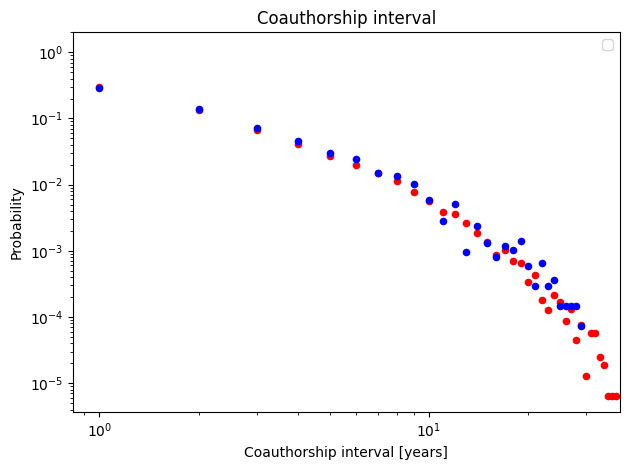

In [14]:
plotter(auth["year"],c="red")
plotter(result["year"])

In [23]:
print(auth.shape[0])
print(result_As.shape[0])
print(auth["source_authid"].nunique())
print(result_As["source_authid"][:auth.shape[0]].nunique())

158426
2750975
3049
2425


In [41]:
works_test = auth["source_authid"].unique()
authors = result_As[result_As["source_authid"].isin(works_test)]["source_authid"].unique()

In [42]:
authors

array([57197435131, 35236910400,  8447975100, 24316204500, 57562266500,
       56533192400,  7005214733,  7007022475, 24734300400, 26435778900,
       57216011112, 57218835489, 55961503900,  6506675079, 24832900700,
       56511445600,  7003551110, 57189093711,  7005737807, 36483668600,
       55476304300, 54889607500,  8685859800, 57218943423,  7102018527,
       54390803400,  6602569589, 57498080400,  6602607320,  7006518498,
       35428153100,  6603795354,  6701408370,  6603902917, 56013248300,
        7202462821,  6508056463, 16479086800,  6603242013, 35227481700,
       16644262200, 55942612500, 23389399000,  6602488890,  6603875883,
       57203256647,  7202596067,  6602319535, 16441426300,  7003793601,
        7006553123, 36026604500, 55330157400,  7005127330, 57203923385,
        7102231509,  8415891400,  7402055952, 57191868023, 23399213000,
       36850431400, 56985257600,  7003953903,  7003541763,  9235640700,
       57194648747, 22634072800,  6603725947, 55853674400, 36674

In [47]:
diff_null_years = []
diff_year = []
for a in authors:
  diff_null_years.append(auth[auth["source_authid"]==a]["year"].sum())
  diff_years.append(result_As[result_As["source_authid"]==a]["year"].sum())


NameError: name 'diff_null_year' is not defined

(array([88., 45., 37., 22., 20., 15., 12., 16., 10., 12., 11.,  7.,  4.,
         7.,  5.,  6.,  5.,  4.,  4.,  6.,  4.,  4.,  3.,  4.,  0.,  2.,
         1.,  3.,  2.,  2.,  3.,  0.,  3.,  0.,  3.,  4.,  2.,  2.,  4.,
         2.,  3.,  1.,  1.,  2.,  4.,  1.,  0.,  0.,  4.]),
 array([  1.        ,   5.06122449,   9.12244898,  13.18367347,
         17.24489796,  21.30612245,  25.36734694,  29.42857143,
         33.48979592,  37.55102041,  41.6122449 ,  45.67346939,
         49.73469388,  53.79591837,  57.85714286,  61.91836735,
         65.97959184,  70.04081633,  74.10204082,  78.16326531,
         82.2244898 ,  86.28571429,  90.34693878,  94.40816327,
         98.46938776, 102.53061224, 106.59183673, 110.65306122,
        114.71428571, 118.7755102 , 122.83673469, 126.89795918,
        130.95918367, 135.02040816, 139.08163265, 143.14285714,
        147.20408163, 151.26530612, 155.32653061, 159.3877551 ,
        163.44897959, 167.51020408, 171.57142857, 175.63265306,
        179.69387

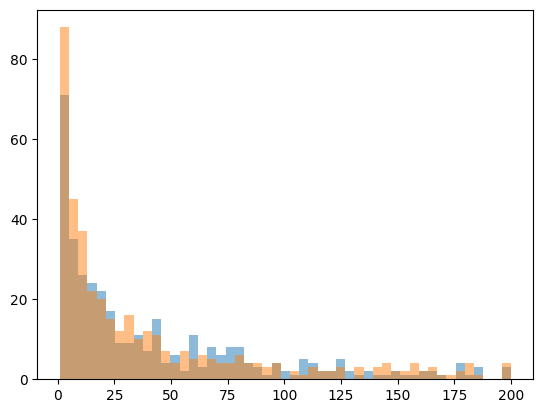

In [55]:

plt.hist(diff_null_years,bins=np.linspace(1,200,50),alpha=0.5)
plt.hist(diff_year,bins=np.linspace(1,200,50),alpha=0.5)


In [56]:
authors_valid.shape[0]

5866880